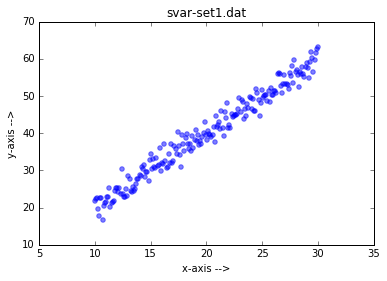

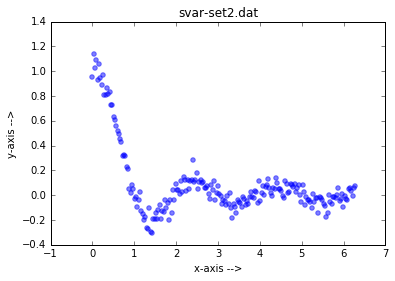

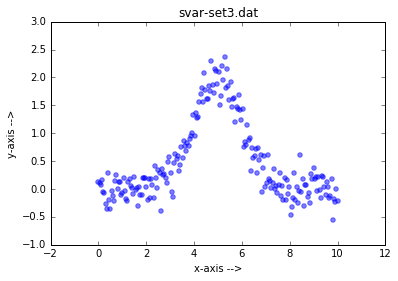

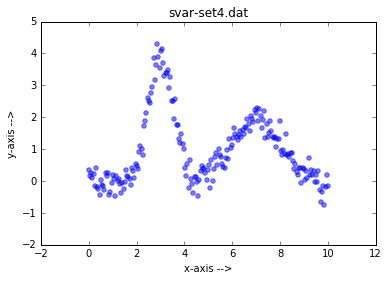

In [265]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
from sklearn import datasets, linear_model
from sklearn.cross_validation import KFold    
import sklearn
from sklearn.metrics import mean_squared_error

# THIS IS TO READ FROM A DAT FILE AND GET A LIST OF LIST WITH WITH EACH COULOUMN AS A LIST
getListFromAFile= lambda filename:np.loadtxt(filename, unpack=True)

# returning the list of all the file  in the folder
getListOfFiles = lambda directoryPath :[f for f in os.listdir(directoryPath) if os.path.isfile(os.path.join(directoryPath, f))] # this is to list all files

# GENRAL CUSTOM 2D PLOTS SCATTER PLOTS
def createPlots(inputList_x,inputList_y,xlabel="x-axis -->",ylabel="y-axis -->",title="file-Name-Title",plotterRef=None):
    #this is for linear regression
    if plotterRef is not None:
        plt.scatter(inputList_x,plotterRef(inputList_x),alpha=0.5,color ='r')   
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.scatter(inputList_x,inputList_y,alpha=0.5,color ='b')
    plt.show()

def showDataInFile(directoryPath):
    with open("Data/"+directoryPath,'r') as f:
        next(f) # skip first row
        df = pd.DataFrame(l.rstrip().split() for l in f)
        df.boxplot
        print(df)

# this like the the execution main
# displaying all the files in Data/ folder  and ploting them
for s in getListOfFiles('Data/'):
    data = getListFromAFile("Data/"+s)
    createPlots(data[0],data[1],'x-axis -->','y-axis -->',s)
    #showDataInFile(s)
    clf = linear_model.LinearRegression()
    clf.fit(data[0].reshape(-1,1),data[1])

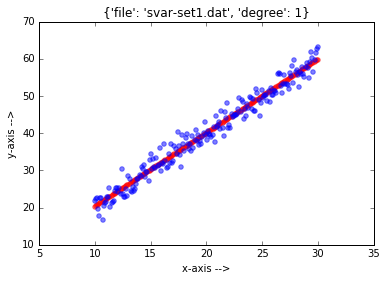

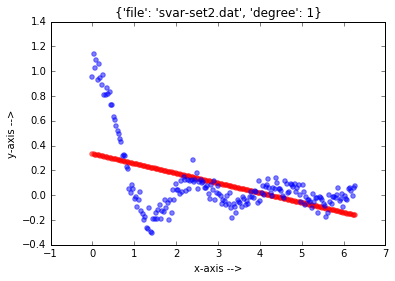

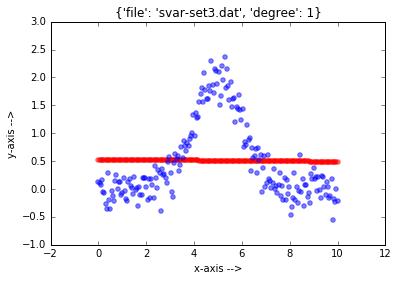

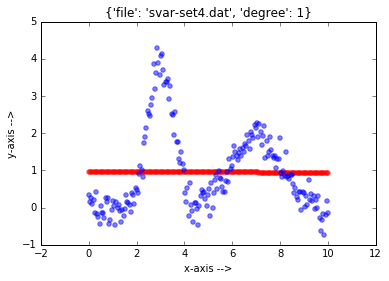

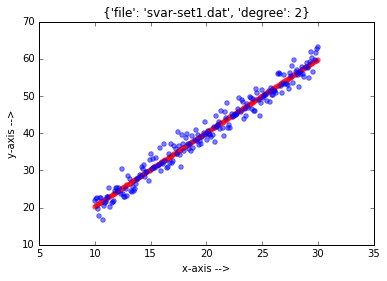

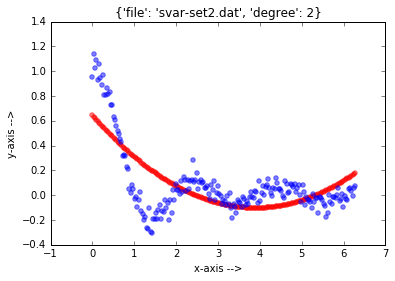

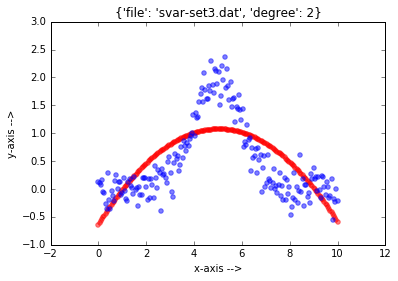

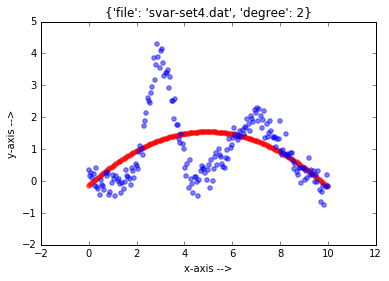

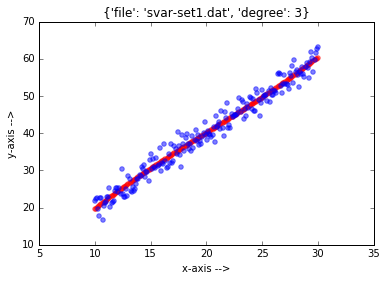

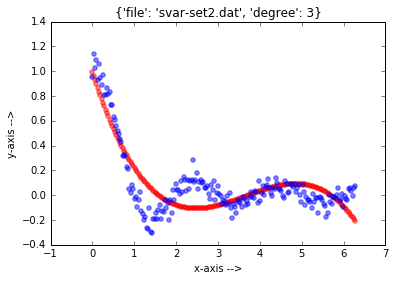

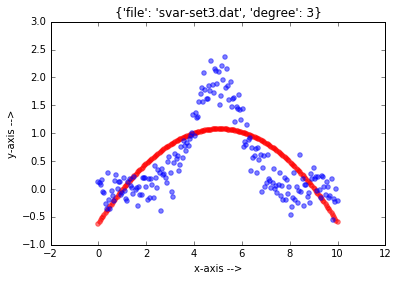

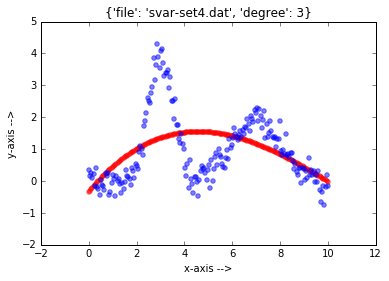

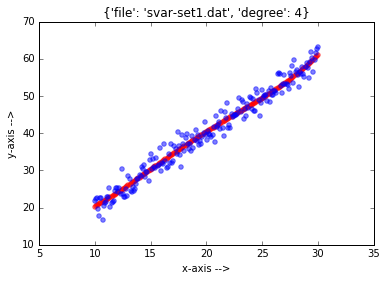

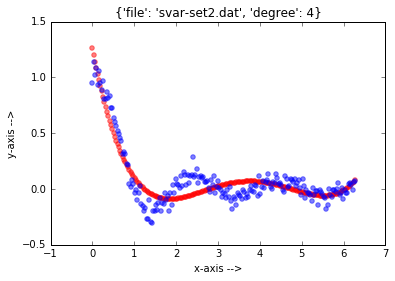

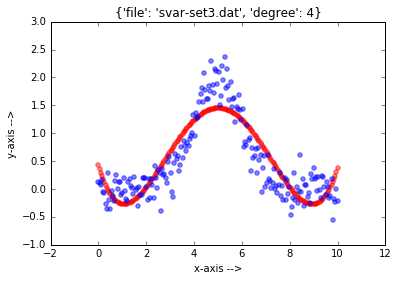

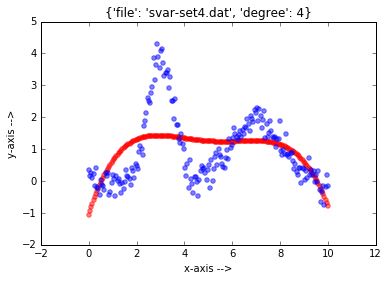

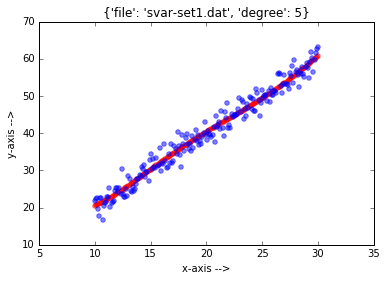

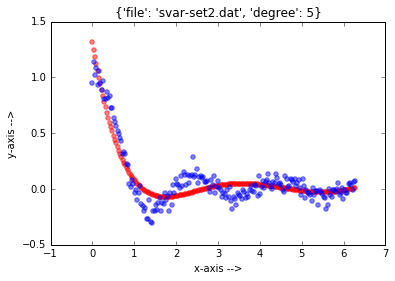

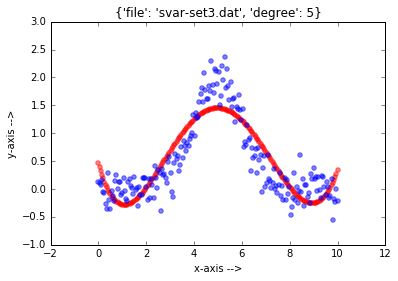

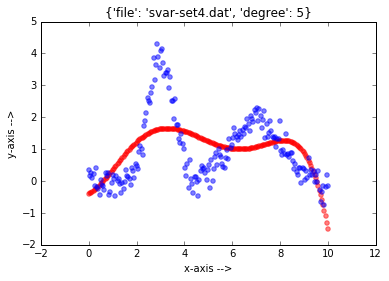

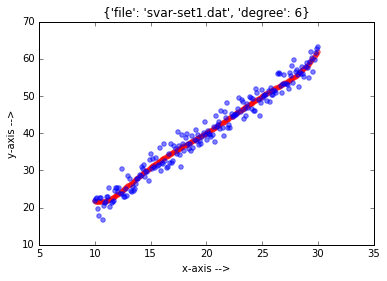

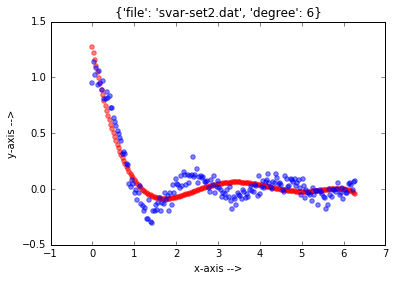

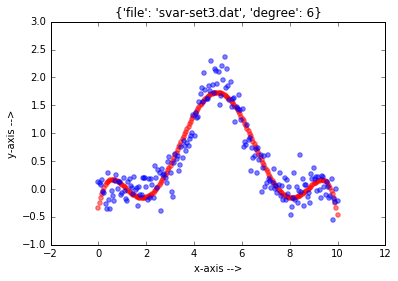

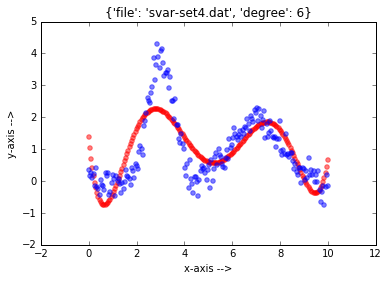

    degree           file       mse
0        1  svar-set1.dat  4.368753
1        1  svar-set2.dat  0.061201
2        1  svar-set3.dat  0.504339
3        1  svar-set4.dat  1.212287
4        2  svar-set1.dat  4.430751
5        2  svar-set2.dat  0.040108
6        2  svar-set3.dat  0.260586
7        2  svar-set4.dat  0.940830
8        3  svar-set1.dat  4.449766
9        3  svar-set2.dat  0.021370
10       3  svar-set3.dat  0.262183
11       3  svar-set4.dat  0.938203
12       4  svar-set1.dat  4.477184
13       4  svar-set2.dat  0.012200
14       4  svar-set3.dat  0.133380
15       4  svar-set4.dat  0.876431
16       5  svar-set1.dat  4.555678
17       5  svar-set2.dat  0.011906
18       5  svar-set3.dat  0.133889
19       5  svar-set4.dat  0.840307
20       6  svar-set1.dat  4.461461
21       6  svar-set2.dat  0.011881
22       6  svar-set3.dat  0.069861
23       6  svar-set4.dat  0.478090


In [259]:
class CustomHyothesis:
    #A x = B    
    def createtor(self):
        aMatrixValueStore=[sum( map(lambda x:x**i,self.xlist)) for i in range(0,(self.degree*2)+1)]
        bMatrixValueStore =[sum([(item*self.ylist[tv1])for tv1 ,item in enumerate(map(lambda x:x**i,self.xlist))]) for i in range(0,(self.degree)+1)]
        MatrixA = [aMatrixValueStore[i:(i+self.degree+1)]for i in range(0,self.degree+1)]
        A = np.matrix(MatrixA)
        B = np.array(bMatrixValueStore)
        self.coeff=np.linalg.solve(A,B.T)
    
    def fit(self,degree,xlist,ylist):
        assert(degree>0)
        assert(len(xlist)==len(ylist))
        
        self.degree = degree
        self.xlist  = xlist
    
        self.ylist  = ylist
        self.createtor()
    
    def predict(self,inList):
        return [sum([self.coeff[j]*(i**j)for j in range(0,self.degree+1)] )for i in inList]       
        
# predicting with kfols and checking oerror wof the custom class
errors =[]
kFolds =10
for itration in xrange(1,7):
    #print "for degree " + str(itration)
    for s in getListOfFiles('Data/'):
        data = getListFromAFile("Data/"+s)
        kf = sklearn.cross_validation.KFold(n=len(data[0]), n_folds=kFolds, shuffle=False,random_state=None)
        error = 0
        regression = CustomHyothesis()
        for train_index, test_index in kf:
#            print("TRAIN:", train_index, "TEST:", test_index)
            X_train, X_test =data[0][train_index], data[0][test_index]
            y_train, y_test = data[1][train_index], data[1][test_index]
            regression.fit(itration,X_train,y_train)
            error = error + mean_squared_error(y_test,regression.predict(X_test))
            #plt.scatter(X_train,regression.predict(X_train),alpha=0.5,color ='r') 
            #plt.scatter(X_train,y_train,alpha=0.5,color ='b')
            #plt.show()
           
        error = error/kFolds
        errors.append({'degree':itration,'file':s,'mse':error})
        createPlots( data[0],data[1],"x-axis -->","y-axis -->",title = str({'degree':itration,'file':s}),plotterRef=regression.predict)    

#print errors
df = pd.DataFrame(errors)
print df 

for s in getListOfFiles('Data/'):
        data = getListFromAFile("Data/"+s)
        regression = CustomHyothesis()
        regression.fit(5,data[0],data[1])
        #plt.scatter(data[0],regression.predict(data[0]),alpha=0.5,color ='r') 
        #plt.scatter(data[0],data[1],alpha=0.5,color ='b')
        #plt.show()

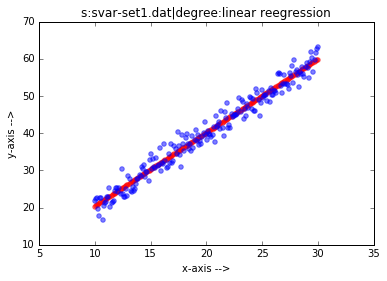

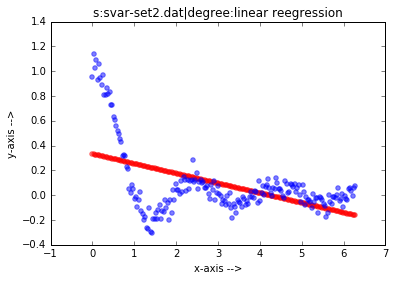

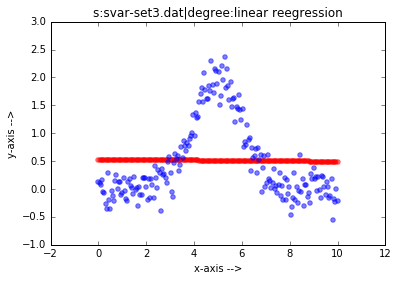

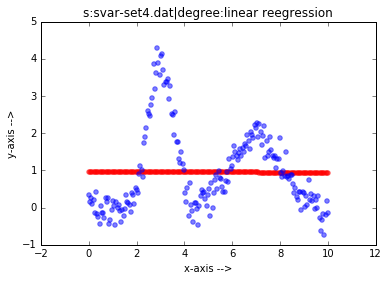

[{'mse': 4.3687525647374814, 'file': 'svar-set1.dat'}, {'mse': 0.06120069267603765, 'file': 'svar-set2.dat'}, {'mse': 0.50433924826320164, 'file': 'svar-set3.dat'}, {'mse': 1.2122870477126195, 'file': 'svar-set4.dat'}]
            file       mse
0  svar-set1.dat  4.368753
1  svar-set2.dat  0.061201
2  svar-set3.dat  0.504339
3  svar-set4.dat  1.212287


In [4]:
# perfroming  linear regression with scikit package
errors =[]
kFolds =10
for s in getListOfFiles('Data/'):
        data = getListFromAFile("Data/"+s)
        kf = sklearn.cross_validation.KFold(n=len(data[0]), n_folds=kFolds, shuffle=False,random_state=None)
        error = 0
        regression = linear_model.LinearRegression()
        for train_index, test_index in kf:
#           print("TRAIN:", train_index, "TEST:", test_index)
            X_train, X_test =data[0][train_index], data[0][test_index]
            y_train, y_test = data[1][train_index], data[1][test_index]
            regression.fit(X_train.reshape(-1, 1),y_train)
            error = error + mean_squared_error(y_test,regression.predict(X_test.reshape(-1, 1)))
       
        error = error/kFolds
        createPlots( data[0].reshape(-1, 1),data[1],xlabel="x-axis -->",ylabel="y-axis -->",title="s:"+s+"|degree:linear reegression",plotterRef=regression.predict)
        errors.append({'file':s,'mse':error})
    

print errors
df = pd.DataFrame(errors)
print df

(3L, 2500L)
             0         1         2
0     1.673469  0.448980  2.861981
1    -0.040816  0.530612  0.519525
2    -0.775510 -1.591837 -2.245761
3    -2.000000 -1.346939 -1.561990
4     0.775510 -0.448980  1.887593
5    -1.265306  1.510204  0.988431
6    -1.836735 -0.612245 -1.085318
7    -1.428571  1.755102  0.803879
8    -0.530612  2.000000  3.182041
9     1.591837 -0.040816  2.351083
10    0.938776  1.591837  3.626071
11   -1.755102  0.612245  0.463408
12    0.448980 -0.612245  1.487056
13    1.918367 -0.612245  2.142605
14   -0.693878 -0.775510 -1.110575
15    1.102041  1.020408  3.929068
16   -1.428571 -1.510204 -1.927879
17   -0.122449 -1.428571 -0.181605
18    1.020408 -0.122449  1.715263
19    1.428571 -1.836735  0.765055
20   -1.673469 -0.204082 -1.280691
21    1.591837  1.183673  3.876431
22   -1.102041  0.693878  0.512397
23   -1.265306  0.693878  0.318421
24    1.836735 -0.040816  2.495058
25   -0.775510  1.755102  1.743185
26   -0.938776  1.346939  1.319050
27    0.

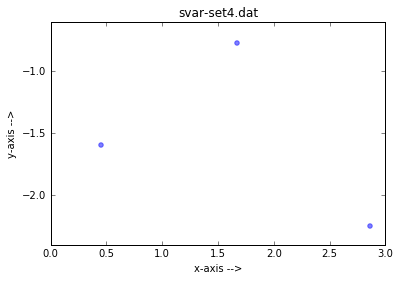

In [262]:
#for s in getListOfFiles('Data1/'):
    #print s
data = getListFromAFile("Data1/mvar-set1.dat")

print data.shape
df = pd.DataFrame(data.T)
print df
print data[0]
createPlots(data.T[0],data.T[2],'x-axis -->','y-axis -->',s)

In [252]:
asd = np.array([[1,2,3],[2,3,4]])
print asd
print len

[[1 2 3]
 [2 3 4]]
(2L, 3L)
